In [1]:
## Slide 8 Example: Constrained norm minimization

import numpy as np
import cvxpy as cp

A = np.random.randn(5,3)
b = np.random.randn(5)

x = cp.Variable(3)

obj = cp.Minimize(cp.norm(A @ x - b, 1))
const = [-0.5 <= x, x <= 0.3]
prob = cp.Problem(obj,const)
prob.solve(verbose=True)
print('optval = {}, status = {}'.format(prob.value,prob.status))

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 8, constraints m = 16
          nnz(P) + nnz(A) = 46
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -3.8551e+01   1.32e+01   6.00e-01   1.00e-01   7.26e-05s
 125   1.6971e+00   1.43e-05   1.17e-05   1.00e-01   1.46e-04s
plsh   1.6971e+00   6.03e-17   2.40e-16   -------

In [2]:
## Other examples from later slides

x, y = cp.Variable(1), cp.Variable(1)
#z = np.hstack((x,y)) will throw an error, need to use cp.hstack
z = cp.hstack((x,y))
cp.sum(z)

Expression(AFFINE, UNKNOWN, ())

In [3]:
cp.square(cp.square(1+x))

Expression(CONVEX, NONNEGATIVE, (1,))

In [4]:
cp.power(x,3)

Expression(CONVEX, NONNEGATIVE, (1,))

In [5]:
cp.quad_over_lin(x,1-cp.square(y))

Expression(CONVEX, NONNEGATIVE, ())

In [6]:
1-cp.square(y)

Expression(CONCAVE, UNKNOWN, (1,))

In [7]:
cp.minimum(1+2*x, 1-cp.maximum(2,y))

Expression(CONCAVE, UNKNOWN, (1,))

In [8]:
cp.sqrt(y) - 4.55 * cp.inv_pos(x-y)

Expression(CONCAVE, UNKNOWN, (1,))

In [9]:
cp.square(x) - cp.square(y)

Expression(UNKNOWN, UNKNOWN, (1,))

In [10]:
cp.sqrt(cp.sum_squares(z))

Expression(QUASICONVEX, NONNEGATIVE, ())

In [11]:
cp.sum_squares(z)

Expression(CONVEX, NONNEGATIVE, ())

In [12]:
cp.norm(z,2)

Expression(CONVEX, NONNEGATIVE, ())

In [13]:
cp.square(1 + x ** 2)

Expression(CONVEX, NONNEGATIVE, (1,))

In [14]:
print((1 + x ** 2).sign)

NONNEGATIVE


In [15]:
## Slide 19: More invovled example

A = np.random.randn(5)
A = np.outer(A,A)

X = cp.Variable((5,5), symmetric=True)
y = cp.Variable(1)

obj = cp.Minimize(cp.norm(X) - 10 * cp.sqrt(y))

const = [X - A >> 0,
        X[1,4] == 2 * y,
        X[2,0] >= 0.8,
        y <= 4]

prob = cp.Problem(obj,const)

prob.solve(verbose=True)
print('(Xopt,yopt) = ({},{}), optval = {}, status = {}'.format(X.value,y.value,prob.value,prob.status))



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 206             
  Cones                  : 1               
  Scalar variables       : 76              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 206             
  Cones                  : 1               
  Scalar variables       : 76              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer  - threads                : 16              
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 126
Optimizer  - Cones                  : 2
Optimizer  - Scalar variables

In [16]:
def deadzone(x):
    return cp.maximum(cp.abs(x)-1,0)

deadzone(12).value

array(11.)

In [17]:
## Slide 19: More invovled example

A = np.random.randn(5)
A = np.outer(A,A)

X = cp.Variable((5,5), symmetric=True)
y = cp.Variable(1)

obj = cp.Minimize(cp.norm(X) + deadzone(-10 * y))

const = [X - A >> 0,
        X[1,4] == 2 * y,
        X[2,0] >= 0.8,
        y <= 4]

prob = cp.Problem(obj,const)

prob.solve(verbose=True)
print('(Xopt,yopt) = ({},{}), optval = {}, status = {}'.format(X.value,y.value,prob.value,prob.status))



Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 207             
  Cones                  : 0               
  Scalar variables       : 74              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 207             
  Cones                  : 0               
  Scalar variables       : 74              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer  - threads                : 16              
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 127
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables

In [21]:
import matplotlib.pyplot as plt

xs = np.linspace(0,5,num=100)
f = xs + xs ** 1.5 + xs ** 2.5



t = cp.Variable(1)
y = cp.Parameter()

obj = cp.Maximize(t)
const = [cp.pos(t) + cp.pos(t) ** 1.5 + cp.pos(t) ** 2.5 <= y]
prob = cp.Problem(obj,const)

g = []
for this_y in xs:
    y.value = this_y
    g.append(prob.solve())



Text(0.5, 1.0, '$g(x)=f^{-1}(x)$')

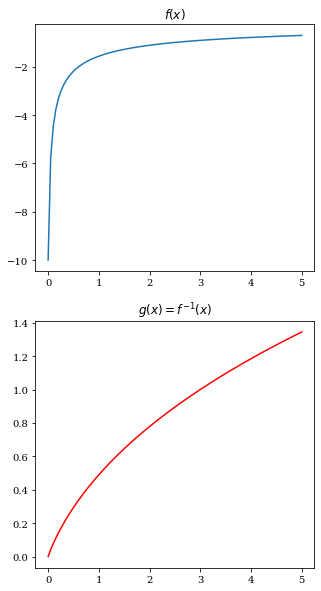

In [32]:
# What do f(x) and g = f^{-1} look like
# It doesn't seem as though CVXPY supports defining
# functions as partially specified optimization problems
# whereas CVX in Matlab does

plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.figure(figsize=(5,10))

plt.subplot(211)
plt.plot(xs,f)
plt.title(r'$f(x)$')

plt.subplot(212)
plt.plot(xs,g,'r')
plt.title(r'$g(x)=f^{-1}(x)$')
